# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, coherent_unitary_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 10
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = [1,10,25,50,100,150] 
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'
# number of shots
nshots = 1024

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

#rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
#rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

# constant circuits from experiment data
import pickle
with open('cs01_rb_circs_n10_length6_sim.pk', 'rb') as fp:
    rb_circs_tuple = pickle.load(fp)    
rb_cnotdihedral_Z_circs, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, rb_cnotdihedral_interleaved_X_circs = rb_circs_tuple

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

                 ░  ░           ┌─┐   
qr_0: ───────────░──░───────────┤M├───
      ┌────────┐ ░  ░ ┌────────┐└╥┘┌─┐
qr_1: ┤ U1(pi) ├─░──░─┤ U1(pi) ├─╫─┤M├
      └────────┘ ░  ░ └────────┘ ║ └╥┘
cr_0: ═══════════════════════════╩══╬═
                                    ║ 
cr_1: ══════════════════════════════╩═
                                      


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

                 ░ ┌─────┐ ░  ░                                      »
qr_0: ───────────░─┤0    ├─░──░─────────────────■─────────────────■──»
      ┌────────┐ ░ │  cs │ ░  ░ ┌────────────┐┌─┴─┐┌───────────┐┌─┴─┐»
qr_1: ┤ U1(pi) ├─░─┤1    ├─░──░─┤ U1(5.4978) ├┤ X ├┤ U1(3.927) ├┤ X ├»
      └────────┘ ░ └─────┘ ░  ░ └────────────┘└───┘└───────────┘└───┘»
cr_0: ═══════════════════════════════════════════════════════════════»
                                                                     »
cr_1: ═══════════════════════════════════════════════════════════════»
                                                                     »
«      ┌────────────┐┌─┐
«qr_0: ┤ U1(2.3562) ├┤M├
«      └────┬─┬─────┘└╥┘
«qr_1: ─────┤M├───────╫─
«           └╥┘       ║ 
«cr_0: ══════╬════════╩═
«            ║          
«cr_1: ══════╩══════════
«                       


In [6]:
#print (rb_cnotdihedral_interleaved_Z_circs[0][0].qasm())

In [7]:
print (rb_cnotdihedral_X_circs[0][0])

      ┌───┐ ░            ░  ░     ░     ┌───┐     ┌─┐   
qr_0: ┤ H ├─░────────────░──░─────░─────┤ H ├─────┤M├───
      ├───┤ ░ ┌────────┐ ░  ░ ┌────────┐└─░─┘┌───┐└╥┘┌─┐
qr_1: ┤ H ├─░─┤ U1(pi) ├─░──░─┤ U1(pi) ├──░──┤ H ├─╫─┤M├
      └───┘ ░ └────────┘ ░  ░ └────────┘  ░  └───┘ ║ └╥┘
cr_0: ═════════════════════════════════════════════╩══╬═
                                                      ║ 
cr_1: ════════════════════════════════════════════════╩═
                                                        


In [8]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

      ┌───┐ ░            ░ ┌─────┐ ░  ░                                      »
qr_0: ┤ H ├─░────────────░─┤0    ├─░──░─────────────────■─────────────────■──»
      ├───┤ ░ ┌────────┐ ░ │  cs │ ░  ░ ┌────────────┐┌─┴─┐┌───────────┐┌─┴─┐»
qr_1: ┤ H ├─░─┤ U1(pi) ├─░─┤1    ├─░──░─┤ U1(5.4978) ├┤ X ├┤ U1(3.927) ├┤ X ├»
      └───┘ ░ └────────┘ ░ └─────┘ ░  ░ └────────────┘└───┘└───────────┘└───┘»
cr_0: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
cr_1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌────────────┐  ░  ┌───┐┌─┐
«qr_0: ┤ U1(2.3562) ├──░──┤ H ├┤M├
«      └─────░──────┘┌───┐└┬─┬┘└╥┘
«qr_1: ──────░───────┤ H ├─┤M├──╫─
«            ░       └───┘ └╥┘  ║ 
«cr_0: ═════════════════════╬═══╩═
«                           ║     
«cr_1: ═════════════════════╩═════
«        

### Add a depolarize noise to the CS gate

In [9]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Qu2 = 0.0004
p1Qu3 = 0.0008
p2Qcx = 0.009892/0.75
p2Qcs = 0.005/0.75

# Construct the error
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Qu2, p1Qu3, p2Qcs, p2Qcx)


# Coherent noise model on cs_gate
err_unitary = np.array([[0.99981975 + 0.01898614j, 0, 0, 0],
                       [0, 0.99981975 + 0.01898614j, 0, 0],
                       [0, 0, 0.99981975 + 0.01898614j, 0],
                       [0, 0, 0, 0.99981975 + 0.01898614j]])
cs_coherent_error = coherent_unitary_error(err_unitary)
# Depolarized error on cs_gate
cs_depol_error = errors.depolarizing_error(p2Qcs, 2)
# composition of the errors
cs_error = cs_depol_error.compose(cs_coherent_error)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu2, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu3, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Qcx, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.0004 0.0008 0.006666666666666667 0.013189333333333332
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'cx', 'u2', 'cs']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [10]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral X Circuits


In [11]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [12]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Z Circuits


In [13]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [14]:
#Create the cnot-dihedral Z and X RB fitters
xdata = [nCliffs]
print (xdata)
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

[[1, 10, 25, 50, 100, 150]]


In [15]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.74892736, 0.97698984, 0.23095149]), 'params_err': array([0.00779055, 0.00079562, 0.00736777]), 'epc': 0.017257621319100996, 'epc_err': 0.0006107672082442991}


In [16]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.7241075 , 0.97547945, 0.25554418]), 'params_err': array([0.00726535, 0.00074705, 0.00712475]), 'epc': 0.01839040876897191, 'epc_err': 0.0005743693422982344}


In [17]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [18]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.72426508, 0.96926682, 0.25367826]), 'params_err': array([0.00855678, 0.00121497, 0.00667603]), 'epc': 0.023049881702232045, 'epc_err': 0.0009401197010272833}


In [19]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.71698334, 0.96600256, 0.26431508]), 'params_err': array([0.00812969, 0.00113233, 0.00653651]), 'epc': 0.025498081342644363, 'epc_err': 0.0008791343631539796}


In [20]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [21]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9757815316280031, 'alpha_err': 0.000633940135673266, 'epg_est': 0.018163851278997695, 'epg_est_err': 0.00048725568822940903}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9666554114472508, 'alpha_err': 0.0009706762163599864, 'epg_est': 0.025008441414561933, 'epg_est_err': 0.0007531196263413421}


In [22]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.007014 (0.000686)
RB fidelity = 0.99299


### Plot the results

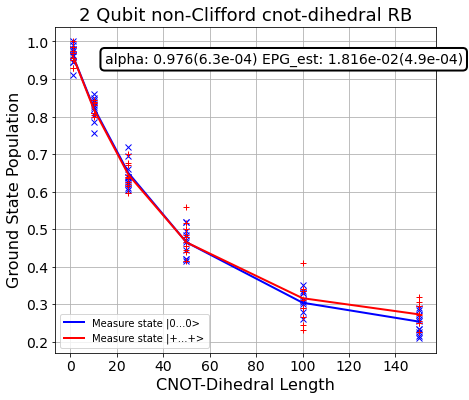

In [23]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

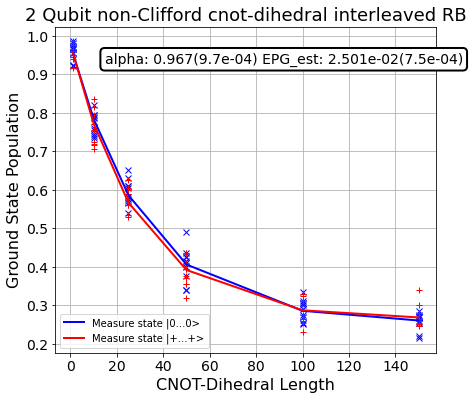

In [24]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()